In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

from PIL import Image
import glob

image_width = 150
image_height = 150

In c:\users\lukec\appdata\local\continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\lukec\appdata\local\continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\lukec\appdata\local\continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\lukec\appdata\local\continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

In [3]:
#load different data
train_path = "dataset/train/"
types = ["0", "1", "2", "3", "4", "5"]
output_size = 6
images = []
labels = []

def loadstuff(data, labels, label, path):
    for filename in glob.glob(path):
        image = cv2.resize(np.array(cv2.imread(filename, cv2.IMREAD_COLOR)), (image_width, image_height), interpolation=cv2.INTER_AREA)
        data.append(np.array(image))
        labels.append(label)
        
    return data, labels

counter = 0
for data in types:
    images, labels = loadstuff(images, labels, counter, train_path + data + "/*.jpg")
    counter += 1

images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)

images = np.reshape(images, (3845, image_width, image_height, 3))
labels = to_categorical(labels)

(3845, 150, 150, 3)
(3845,)


#load data
callMe = "HandGesture/images/call_me/*.jpg"
fingersCrossed = "HandGesture/images/fingers_crossed/*.jpg"
okay = "HandGesture/images/okay/*.jpg"
paper = "HandGesture/images/paper/*.jpg"
peace = "HandGesture/images/peace/*.jpg"
rock = "HandGesture/images/rock/*.jpg"
rock_on = "HandGesture/images/rock_on/*.jpg"
scissor = "HandGesture/images/scissor/*.jpg"
thumbs = "HandGesture/images/thumbs/*.jpg"
up = "HandGesture/images/up/*.jpg"

types = ["Call Me", "Fingers Crossed", "Okay", "Paper", "Peace", "Rock", "Rock On", "Scissor", "Thumbs", "Up"]

images = []
labels = []
output_size = 10

def loadstuff(data, labels, label, path):
    for filename in glob.glob(path):
        image = cv2.resize(np.array(Image.open(filename)), (image_width, image_height), interpolation=cv2.INTER_AREA)
        data.append(np.array(image))
        labels.append(label)
        
    return data, labels

images, labels = loadstuff(images, labels, 0, callMe)
images, labels = loadstuff(images, labels, 1, fingersCrossed)
images, labels = loadstuff(images, labels, 2, okay)
images, labels = loadstuff(images, labels, 3, paper)
images, labels = loadstuff(images, labels, 4, peace)
images, labels = loadstuff(images, labels, 5, rock)
images, labels = loadstuff(images, labels, 6, rock_on)
images, labels = loadstuff(images, labels, 7, scissor)
images, labels = loadstuff(images, labels, 8, thumbs)
images, labels = loadstuff(images, labels, 9, up)
images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)
labels = to_categorical(labels)
images = np.reshape(images, (5243, image_width, image_height, 1))
print("Done!")

In [12]:
#make the model
model = Sequential()

model.add(Conv2D(64, input_shape=(image_width, image_height, 3), kernel_size=[3,3], activation='relu'))
model.add(MaxPooling2D(pool_size=[3,3]))
model.add(Conv2D(120, kernel_size=[3,3], activation='relu'))
model.add(MaxPooling2D(pool_size=[3,3]))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(output_size, activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 120)       69240     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 120)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 27000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               2700100   
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)              

In [13]:
#train the model
model.fit(images, labels, batch_size=6, epochs=50, verbose = 1, shuffle=True)

#saving the model
model.save("Congressional.h5")
print("Saved!")

Train on 3845 samples
Epoch 1/50
3845/3845 [==============================] - 5s 1ms/sample - loss: 1.6664 - accuracy: 0.7930
Epoch 2/50
3845/3845 [==============================] - 5s 1ms/sample - loss: 0.4219 - accuracy: 0.8298
Epoch 3/50
3845/3845 [==============================] - 5s 1ms/sample - loss: 0.4058 - accuracy: 0.8298
Epoch 4/50
3845/3845 [==============================] - 5s 1ms/sample - loss: 0.3881 - accuracy: 0.8334
Epoch 5/50
3845/3845 [==============================] - 4s 1ms/sample - loss: 0.3706 - accuracy: 0.8374
Epoch 6/50
3845/3845 [==============================] - 5s 1ms/sample - loss: 0.3527 - accuracy: 0.8427
Epoch 7/50
3845/3845 [==============================] - 4s 1ms/sample - loss: 0.3339 - accuracy: 0.8486
Epoch 8/50
3845/3845 [==============================] - 4s 1ms/sample - loss: 0.3103 - accuracy: 0.8593
Epoch 9/50
3845/3845 [==============================] - 4s 1ms/sample - loss: 0.2954 - accuracy: 0.8658
Epoch 10/50
3845/3845 [===================

Prediction:  2


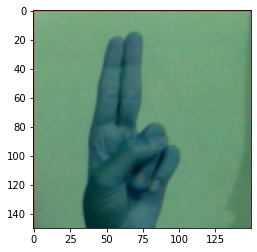

In [38]:
#testing the model
import random

model = load_model("Congressional.h5")

#take a random image and process it
image = random.choice(images)
plt.imshow(image)
image = tf.cast(image, tf.float32)
image = np.reshape(image, (1, image_width, image_height, 3))
pred = model.predict(image)
print("Prediction: ", types[pred.argmax()])

In [5]:
print(images[3].shape)

(100, 100)
